In [1]:
# automatically update imports
%load_ext autoreload
%autoreload 2

# snippet for relative imports
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import loaders


bbox=[45.1217, 5.6161, 45.2242, 5.84444]

In [3]:
geo_graph = loaders.load_graph('grenoble', bbox)

In [4]:
pois = loaders.load_pois_df('grenoble', bbox)

In [5]:
category_gb = pois.groupby(by=['key'])

In [6]:
for category in category_gb:
    print(category[0], len(category[1]))

('amenity', 1849)
('building', 4)
('landuse', 1)
('leisure', 40)
('shop', 2082)


In [7]:
pois = pois[pois['key'] != 'landuse'] # delete `landuse` since there is only one item
category_gb = pois.groupby(by=['key']) 

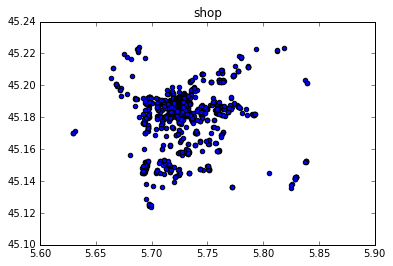

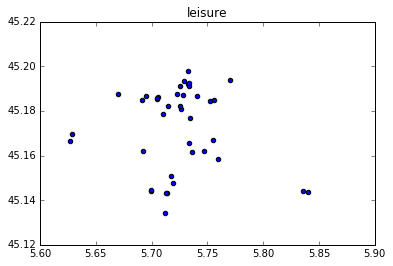

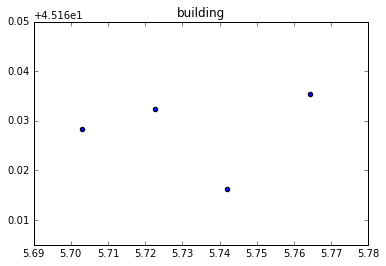

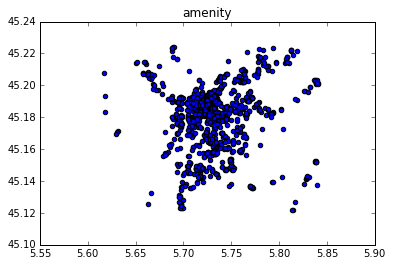

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline
for category, items in category_gb:
    plt.figure()
    plt.title(category)
    plt.scatter(items['lon'], items['lat'])
    plt.show()

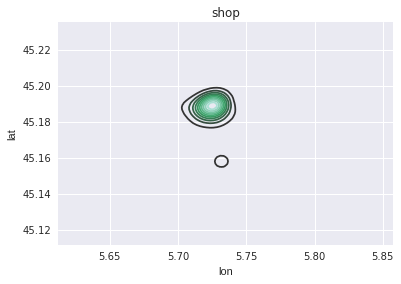

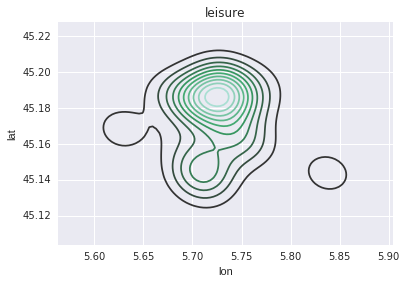

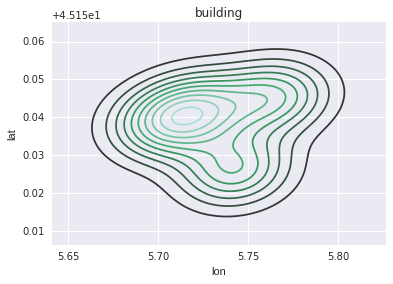

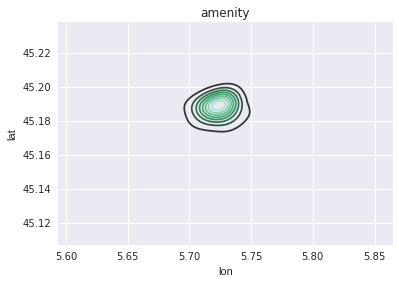

In [9]:
import seaborn as sns

%matplotlib inline
for category, items in category_gb:
    plt.figure()
    plt.title(category)
    sns.kdeplot(items['lon'], items['lat'])

In [34]:
import numpy as np
from pandas import DataFrame
from sklearn.neighbors.kde import KernelDensity

nodes_array = np.array([list(node.pos) for node in geo_graph])
# nodes_array =network.nodes_df[['x','y']].values
kde_df = DataFrame(index=[node.id for node in geo_graph])

for category, items in category_gb:
    kde = KernelDensity()
    kde.fit(items[['lon','lat']].values)
    category_density_array = kde.score_samples(nodes_array)
    kde_df[category] = category_density_array

    kde_df.head()

             amenity  building   leisure      shop
482855984  -1.839211 -1.839092 -1.839428 -1.839064
1165066246 -1.839062 -1.839059 -1.839121 -1.838848
1409886892 -1.839316 -1.839349 -1.839305 -1.839104
1165066250 -1.838944 -1.838922 -1.839041 -1.838729
1165066252 -1.838954 -1.838934 -1.839048 -1.838740

In [45]:
import pandas as pd

centrality_df = pd.read_pickle('grenoble_centrality_df.p')

           betweenness  closeness    degree
844065421     0.000137   0.010783  0.000216
844668858     0.000421   0.009030  0.000162
844809839     0.001118   0.010230  0.000162
844809888     0.000081   0.010013  0.000108
14565832      0.000198   0.009013  0.000108


In [49]:
kde_centrality_df = pd.concat([
    DataFrame({ key: value for (key, value) in zip(kde_df.columns, list(map(kde_df.__getitem__, kde_df.columns))) }),
    centrality_df], axis=1)
# old dict passed to DataFrame: {'amenity': kde_df['amenity'], 'building': kde_df['building'], 'leisure': kde_df['leisure'], 'shop': kde_df['shop'],}
print(kde_centrality_df.head())

         amenity  building   leisure      shop  betweenness  closeness  \
124550 -1.838510 -1.838382 -1.838814 -1.838294     0.000000   0.010407   
124551 -1.838492 -1.838355 -1.838810 -1.838277     0.000045   0.010533   
124552 -1.838488 -1.838349 -1.838809 -1.838277     0.002512   0.010244   
124553 -1.838505 -1.838373 -1.838812 -1.838292     0.000281   0.010666   
124554 -1.838703 -1.838637 -1.838895 -1.838479     0.001939   0.011741   

          degree  
124550  0.000108  
124551  0.000162  
124552  0.000162  
124553  0.000162  
124554  0.000162  


In [51]:
print(kde_centrality_df.corr())

              amenity  building   leisure      shop  betweenness  closeness  \
amenity      1.000000  0.990246  0.977203  0.998260     0.051123   0.497964   
building     0.990246  1.000000  0.938520  0.982518     0.046532   0.483192   
leisure      0.977203  0.938520  1.000000  0.983070     0.053600   0.499380   
shop         0.998260  0.982518  0.983070  1.000000     0.055095   0.502452   
betweenness  0.051123  0.046532  0.053600  0.055095     1.000000   0.245358   
closeness    0.497964  0.483192  0.499380  0.502452     0.245358   1.000000   
degree       0.136902  0.128275  0.144659  0.138973     0.117727   0.320037   

               degree  
amenity      0.136902  
building     0.128275  
leisure      0.144659  
shop         0.138973  
betweenness  0.117727  
closeness    0.320037  
degree       1.000000  


In [56]:
# plot
from geo_graph import GeoGraph

g = GeoGraph(network)

In [60]:
%matplotlib qt
# for col in kde_centrality_df:
# g.plot(node_color=[kde_centrality_df[col][node.id] for node in g._G])
g.plot(node_color=[kde_centrality_df['amenity'][node.id] for node in g._G])